In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [6]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

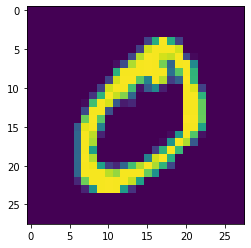

In [15]:
plt.imshow(x_train[1])

In [16]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
#to convert values between 0 nad 1
x_train=x_train/255
x_test=x_test/255

In [18]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
model=Sequential()

In [20]:
#to convert (28,28) to 1D array
model.add(Flatten(input_shape=(28,28)))

In [50]:
model.add(Dense(128,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 105,412
Trainable params: 105,412
Non-trai

In [52]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [54]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0250 - accuracy: 0.9956 - val_loss: 0.1534 - val_accuracy: 0.9768
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0228 - accuracy: 0.9961 - val_loss: 0.1525 - val_accuracy: 0.9762
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0232 - accuracy: 0.9957 - val_loss: 0.1619 - val_accuracy: 0.9756
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0224 - accuracy: 0.9961 - val_loss: 0.1704 - val_accuracy: 0.9732
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0198 - accuracy: 0.9964 - val_loss: 0.1778 - val_accuracy: 0.9741
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0216 - accuracy: 0.9959 - val_loss: 0.1704 - val_accuracy: 0.9747
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0188 - accuracy: 0.9965 - val_loss: 0.1713 - val_accuracy:

In [55]:
y_prob=model.predict(x_test)

In [56]:
y_prob[1]

array([5.8811239e-04, 3.7259603e-04, 9.9753112e-01, 1.6556492e-04,
       5.1427842e-04, 5.1401705e-05, 6.4994449e-05, 2.9119104e-04,
       3.0391064e-04, 1.1676920e-04], dtype=float32)

In [57]:
#probability values of 10 classes are returned we have to fetch index with highest probability
y_pred=y_prob.argmax(axis=1)

In [58]:
y_pred[1]

2

In [59]:
y_prob[3]

array([9.9980396e-01, 1.7033806e-06, 1.7389701e-05, 1.6611521e-06,
       1.0417027e-06, 8.5447600e-06, 4.7290352e-05, 9.9671406e-06,
       6.4530337e-05, 4.3811611e-05], dtype=float32)

In [60]:
y_pred[3]

0

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9737

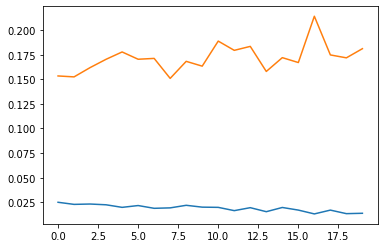

In [62]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

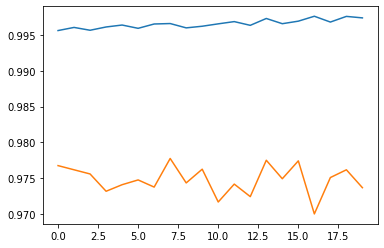

In [63]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])